In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def ShowImage(img):
    plt.axis("off")
    plt.imshow(img, cmap='gray')
    plt.show()

In [7]:
def scale_image(img, S):
    r,c = img.shape
    shift = (int(c/2),int(r/2)) 
    T = np.float32([[1, 0, -shift[0]], [0, 1, -shift[1]]])
    Tr = np.float32([[1, 0, shift[0]], [0, 1,  shift[1]]])
    Sx, Sy = S[0], S[1]
    S = np.array([[Sx,0, 0],[0, Sy, 0]])
    out = np.zeros_like(img, dtype='u1')  
    for i in range(r):
        for j in range(c):
            x = j
            y = i
            xy = np.array([x, y, 1])
            new_xy = np.dot(T, xy)  
            xy = np.array([int(new_xy[0]), int(new_xy[1]), 1])
            new_xy = np.dot(S, xy)  
            xy = np.array([int(new_xy[0]), int(new_xy[1]), 1])
            new_xy = np.dot(Tr, xy)              
            xn = int(new_xy[0])
            yn = int(new_xy[1])
            if 0 <= xn < c and 0 <= yn < r:
                out[yn,xn] = img[y,x]
    return out.astype(np.uint8)


In [5]:
img = cv2.imread("./images/cameraman.png", 0)

In [8]:
scales = (0.6, 0.6)      # (sx,sy)
scale_img = scale_image(img, scales)

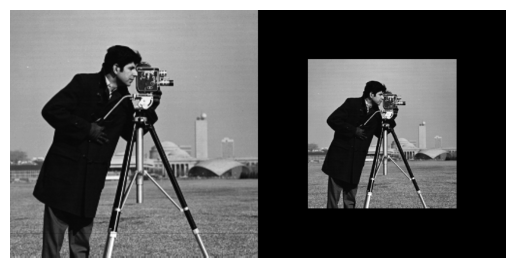

In [9]:
mul_img = cv2.hconcat([img, scale_img])
ShowImage(mul_img)